In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_name(opt):
    return opt['model']+'_seed'+str(seed)+'_'+opt['AL_strategy']
opt = {}
opt['data_set']='MNIST'

AL_strategies = ['random', 'entropy', 'bald', 'variation_ratio', 'mean_std']
Models = ['CNN', 'Linear', 'H1', 'H2']

dir_name = 'C:/Users/jiuji/OneDrive/Documents/GitHub/CSML_Project/save/Robustness/'

In [3]:
# read results
res = {}
for seed in range(0,5):
    
    for model_indx in range(0,4):
        for AL_indx in range(0,5):

            opt['AL_strategy'] = AL_strategies[AL_indx]
            opt['model'] = Models[model_indx]
        
            if (opt['model'] not in res.keys()):
                res[opt['model']]= {}
                
            if (opt['AL_strategy'] not in res[opt['model']].keys()):
                res[opt['model']][opt['AL_strategy']] = list()
                
            file_name = dir_name + get_name(opt) +'.npy'
            
            with open(file_name, 'rb') as f:
                res[opt['model']][opt['AL_strategy']].append(np.load(f))



In [4]:
# average seeds:
res_stat = {}
res_stat['mean'] = {}
res_stat['std'] = {}

for model_indx in range(0,4):
    for AL_indx in range(0,5):

        opt['AL_strategy'] = AL_strategies[AL_indx]
        opt['model'] = Models[model_indx]
        
        temp = np.stack(res[opt['model']][opt['AL_strategy']])
        mu = temp.mean(0)
        sigma = temp.std(0)
        
        if (opt['model'] not in res_stat['mean'].keys()):
            res_stat['mean'][opt['model']] = {}
            res_stat['std'][opt['model']] = {}
            
        if (opt['AL_strategy'] not in res_stat['mean'][opt['model']].keys()):
            res_stat['mean'][opt['model']][opt['AL_strategy']] = list()
            res_stat['std'][opt['model']][opt['AL_strategy']] = list()
                               
        res_stat['mean'][opt['model']][opt['AL_strategy']].append(mu)
        res_stat['std'][opt['model']][opt['AL_strategy']].append(sigma)
        

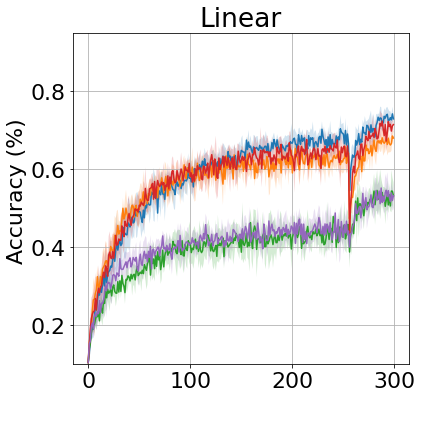

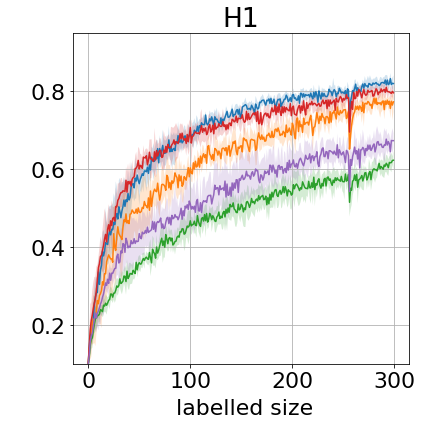

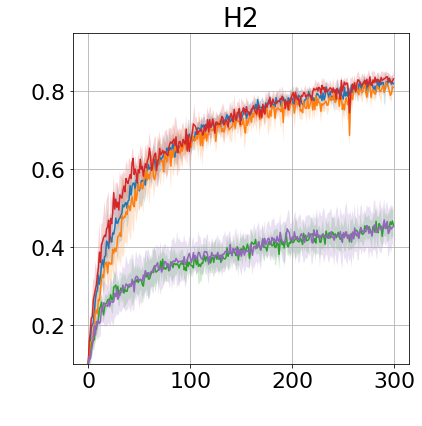

In [39]:
##### check iid benchmark:
plt.rcParams.update({'font.size': 22})

labels = ['iid (baseline)','Entropy','BALD', 'VarRatio', 'STD']
col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for model_indx in range(1,4,1):
    fig, axs = plt.subplots(1, 1, tight_layout=True, figsize = (6,6)) 
    opt['model'] = Models[model_indx]
    
    for AL_indx in range(0,5):
        opt['AL_strategy'] = AL_strategies[AL_indx]
        
        mu = res_stat['mean'][opt['model']][opt['AL_strategy']][0]
        sigma = res_stat['std'][opt['model']][opt['AL_strategy']][0]
        
        axs.plot(range(300),mu, label = labels[AL_indx], linewidth=1.5)
        axs.fill_between(range(300), mu-sigma, mu+sigma, alpha = 0.2)

    #axs.legend()
    if (opt['model'] == 'H1'):
        fig.text(0.55, 0.00, 'labelled size', ha='center')
    else:
        fig.text(0.55, 0.00, ' ', ha='center')
        
    if (opt['model'] == 'Linear'):
        fig.text(0.00, 0.36, 'Accuracy (%)', rotation='vertical')
    else:
        fig.text(0.00, 0.36, ' ', rotation='vertical')
        
        
    axs.title.set_text(opt['model'])
    axs.set_ylim([0.1, 0.95])
    plt.grid()

    save_path = dir_name + opt['model'] + '_' +'al.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')


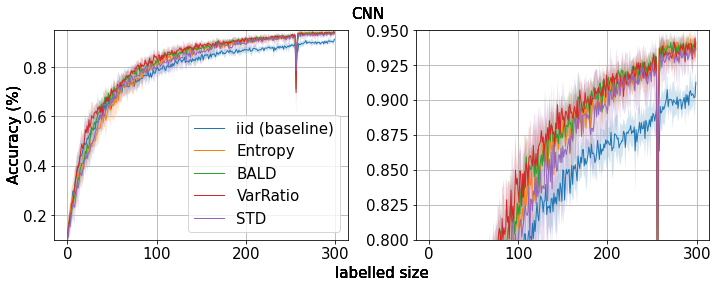

In [37]:
plt.rcParams.update({'font.size': 15})

for model_indx in range(0,1):
    fig, axs = plt.subplots(1, 2, tight_layout=True, figsize = (10,3.75)) 
    opt['model'] = Models[model_indx]
    
    for AL_indx in range(0,5):
        opt['AL_strategy'] = AL_strategies[AL_indx]
        
        mu = res_stat['mean'][opt['model']][opt['AL_strategy']][0]
        sigma = res_stat['std'][opt['model']][opt['AL_strategy']][0]
        
        axs[0].plot(range(300),mu, label = labels[AL_indx], linewidth=1)
        axs[0].fill_between(range(300), mu-sigma, mu+sigma, alpha = 0.2)
        
        axs[1].plot(range(300),mu, label = labels[AL_indx], linewidth=1)
        axs[1].fill_between(range(300), mu-sigma, mu+sigma, alpha = 0.2)
        
        
        axs[0].legend()
        axs[0].set_ylim([0.1, 0.95])
        axs[1].set_ylim([0.8, 0.95])

        fig.text(0.5, 0.96, opt['model'], ha='center')
        fig.text(0.52, 0.00, 'labelled size', ha='center')
        fig.text(0.00, 0.36, 'Accuracy (%)', rotation='vertical')
        axs[0].grid()
        axs[1].grid()
        
        #axs.title.set_text(opt['model'])
    
        
    save_path = dir_name + opt['model'] + '_' +'al.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [54]:
# TO DO:
# 1. MAJOR GRID ON
# 2. SAME Y-SCALE FOR ALL PLOTS APART FROM ZOOMED IN ONE
# 3. increase single plots font
# 4. increase height of the single plots

3.75